### Import Libraries

In [7]:
"If it does not work use code below while running this notebook in this dir."
# import sys
# import os
# sys.path.append(os.path.abspath(os.getcwd()))

from mytorch import Tensor, Model
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim 
from mytorch import layer as nn
from mytorch.util import DataLoader
from mytorch.util import flatten
import numpy as np
import matplotlib.pyplot as plt

### Load MNIST

In [8]:
"""
load data set with given data loader.
you have 10000 train data, 1000 for each number, remember to shuffle training data.
you have 1000 test data, 100 for each number.

loaded data is a list of (img, label)
type of img is Tensor.

TODO: you have to get this list and create batches for training.
you can also apply this changes later in the Training part for convenience.
"""
data_loader = DataLoader(train_addr='MNIST/train', test_addr='MNIST/test')
data_loader.load()
"you can see how data is loaded"
print(data_loader.getTrain()[0][0].shape)
print(data_loader.getTrain()[0][1].shape)

loading train...
loading test...
processing...
(500, 28, 28)
(500,)


### Define and Create your Model

In [9]:
class MyModel(Model):
    def __init__(self):
        """TODO: define your layers. order is important"""
        super().__init__()
        self.layer1 = nn.Linear(784, 500)  
        self.layer2 = nn.Linear(500, 128)  
        self.layer3 = nn.Linear(128, 10)    
        
        self.relu = active_func.relu
        self.softmax = active_func.softmax

    def forward(self, x: Tensor) -> Tensor:
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        return self.softmax(self.layer3(x))

model = MyModel()
print(model.summary())

layer1:  linear - total param: 392000 - in: 784, out: 500
layer2:  linear - total param: 64000 - in: 500, out: 128
layer3:  linear - total param: 1280 - in: 128, out: 10
None


### Choose a Loss Function

In [10]:
"TODO: choose a proper loss function"
criterion = loss_func.CategoricalCrossEntropy

### Choose an Optimizer

In [11]:
"TODO: choose a proper optimizer"
optimizer = optim.sgd.SGD(model.parameters(), learning_rate=0.001)

### Training Model

In [12]:
"TODO: define number of epoch and train batches of data on your model. also test each epoch."
EPOCH = 20

for i in range(EPOCH):

    train_acc = []
    test_acc = []
    best_train_acc = 0.0
    best_test_acc = 0.0

    "TODO: train over your defined batches and save train accuracy for each epoch."
    trn_corr = 0
    tst_corr = 0
    
    for inputs, labels in data_loader.getTrain():
        reshaped_data = Tensor(inputs.data.reshape((-1 , 784)) / 255.)

        one_hot_matrix = np.zeros((labels.shape[0], 10))
        one_hot_matrix[np.arange(labels.shape[0]), labels.data] = 1
        
        outputs = model.forward(reshaped_data)
        optimizer.zero_grad()
        
        loss = criterion(outputs, Tensor(one_hot_matrix))
        
        loss.backward()
        optimizer.step()

        # Calculate correct predictions for training
        predicted = np.argmax(outputs.data , 1)
        trn_corr += np.sum(predicted == labels.data)

    epoch_train_acc = (trn_corr / 10000) * 100
    train_acc.append(epoch_train_acc)
    if epoch_train_acc > best_train_acc:
        best_train_acc = epoch_train_acc


    "TODO: test your model after each training and save test accuracy for each epoch."
    for test_inputs, test_labels in data_loader.getTest():
        reshaped_data = Tensor(test_inputs.data.reshape((-1 , 784)) / 255.)
        test_outputs = model.forward(reshaped_data)
        predicted_test = np.argmax(test_outputs.data, 1)
        tst_corr += np.sum(predicted_test == test_labels.data)

    epoch_test_acc = (tst_corr / 1000) * 100
    test_acc.append(epoch_test_acc)
    if epoch_test_acc > best_test_acc:
        best_test_acc = epoch_test_acc

    print(f"Epoch {i+1}/{EPOCH}, Train Accuracy: {epoch_train_acc}%, Test Accuracy: {epoch_test_acc}%")
        


Epoch 1/20, Train Accuracy: 56.269999999999996%, Test Accuracy: 71.39999999999999%
Epoch 2/20, Train Accuracy: 78.89%, Test Accuracy: 77.9%
Epoch 3/20, Train Accuracy: 85.59%, Test Accuracy: 84.8%
Epoch 4/20, Train Accuracy: 89.18%, Test Accuracy: 87.6%
Epoch 5/20, Train Accuracy: 90.46%, Test Accuracy: 88.4%
Epoch 6/20, Train Accuracy: 91.51%, Test Accuracy: 89.3%
Epoch 7/20, Train Accuracy: 92.33%, Test Accuracy: 89.8%
Epoch 8/20, Train Accuracy: 92.9%, Test Accuracy: 90.7%
Epoch 9/20, Train Accuracy: 93.35%, Test Accuracy: 91.4%
Epoch 10/20, Train Accuracy: 93.87%, Test Accuracy: 91.4%
Epoch 11/20, Train Accuracy: 94.19999999999999%, Test Accuracy: 91.5%
Epoch 12/20, Train Accuracy: 94.63000000000001%, Test Accuracy: 91.4%
Epoch 13/20, Train Accuracy: 94.92%, Test Accuracy: 91.9%
Epoch 14/20, Train Accuracy: 95.28%, Test Accuracy: 92.0%
Epoch 15/20, Train Accuracy: 95.49%, Test Accuracy: 92.10000000000001%
Epoch 16/20, Train Accuracy: 95.83%, Test Accuracy: 92.30000000000001%
Epoch 

### Evaluate Model Performance

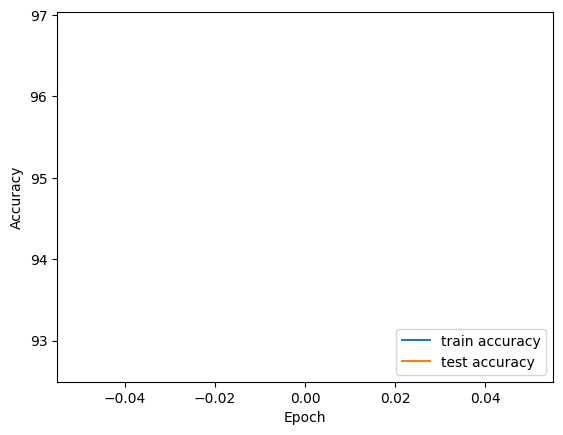


On train - best accuracy: 96.83, final accuracy: 96.83
On test - best accuracy: 92.70, final accuracy: 92.70


In [13]:
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show();

print("\nOn train - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_train_acc, train_acc[-1]))
print("On test - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_test_acc, test_acc[-1]))